# Step 2: Cluster Analysis

## 2.0 Imports & Data Loading

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [15]:
master_df = pd.read_csv("../output/master_df.csv")
master_df.head()

,distname,schoolname,flag_nerds,flag_f33,ncesenroll,gradespan,pp_stloc_raw_MA,pp_fed_raw_MA,pp_total_raw_MA,schoolstloc_raw_MA,...,males_staff,fte_staff,student_teacher_ratio,student_teacher_ratio_nan_flag,District Name,District Code,salary_totals_teachers,avg_salary_teachers,FTE Count,no_salary_flag
0,Abington,Abington High,0,0,545.0,09-12,14880.475672,20.812074,14901.287746,8.052652e+06,...,27.5,62,14.4,False,Abington,10000.0,11469788.0,93861.0,11469788.0,False
1,Abington,Abington Middle School,0,0,672.0,05-08,13057.825084,83.417661,13141.242745,8.839857e+06,...,22.7,73,17.6,False,Abington,10000.0,11469788.0,93861.0,11469788.0,False
2,Abington,Woodsdale Elementary School,0,0,294.0,03-04,13201.700857,499.583587,13701.284443,3.841768e+06,...,11.2,39,18.0,False,Abington,10000.0,11469788.0,93861.0,11469788.0,False
3,Acton-Boxborough,Acton-Boxborough Regional High,0,0,1837.0,09-12,14634.333856,191.007988,14825.341844,2.676628e+07,...,23.9,195,14.7,False,Acton-Boxborough,6000000.0,32945978.0,86677.0,32945978.0,False
4,Acton-Boxborough,Blanchard Memorial School,0,0,464.0,KG-06,16005.357328,289.306328,16294.663656,7.481971e+06,...,8.6,79,14.3,False,Acton-Boxborough,6000000.0,32945978.0,86677.0,32945978.0,False


## 2.1 Cluster Analysis - General Insight Extraction (WIP)
- Format the learnings into more readable / understandable format
- Maybe write one sentence blurbs for each one too
- Need to add more columns for some of the correlation analysis
- Analyze the hierarchal outcome. what were the main groupings?
- Add a paragraph summarizing the learnings in the last section

### 2.1.1 KMeans - Economic and Race Features Only - 2 Clusters

In [16]:
# select the columns you want to calculate correlation with
from sklearn.cluster import KMeans

columns_of_interest = ['High Needs #.1', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'Native American']

# calculate the correlations between the selected columns and the test performance column
correlations = master_df[columns_of_interest]
correlations = correlations.dropna()

df_standardized = (correlations - correlations.mean()) / correlations.std()
df_standardized

# # fit the k-means algorithm on the standardized data
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_standardized)

# get the cluster labels for each school
cluster_labels = kmeans.labels_

# add the cluster labels as a new column to the original dataframe
correlations['cluster'] = cluster_labels

# calculate the mean values of each feature for each cluster
cluster_means = correlations.groupby('cluster').mean()

# explanatory analysis
print(correlations['cluster'].value_counts())

# filter the dataframe to only include rows in cluster 0
cluster_0 = correlations[correlations['cluster'] == 0]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 0
cluster_0_mean_values = cluster_0.groupby('cluster').mean()
print(cluster_0_mean_values)

# # group by the 'cluster' column and calculate the median value of each column for the rows in cluster 0
# cluster_0_median_values = cluster_0.groupby('cluster').median()
# print(cluster_0_median_values)

# filter the dataframe to only include rows in cluster 1
cluster_1 = correlations[correlations['cluster'] == 1]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 0
cluster_1_mean_values = cluster_1.groupby('cluster').mean()
print(cluster_1_mean_values)

# # group by the 'cluster' column and calculate the median value of each column for the rows in cluster 0
# cluster_1__median_values = cluster_1.groupby('cluster').median()
# print(cluster_1__median_values)

1    1050
0     395
Name: cluster, dtype: int64
         High Needs #.1  Economically Disadvantaged %  African American  \
cluster                                                                   
0             76.459241                      60.65038         16.827342   

            Asian   Hispanic      White  Native American  
cluster                                                   
0        6.218228  47.119241  25.706076         0.221772  
         High Needs #.1  Economically Disadvantaged %  African American  \
cluster                                                                   
1             34.542476                     19.392095          3.493524   

            Asian  Hispanic      White  Native American  
cluster                                                  
1        6.629238  7.743524  77.760476         0.223143  


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 2.1.2 KMeans - Economic and Race Features Only - 3 Clusters

In [17]:
# select the columns you want to calculate correlation with
from sklearn.cluster import KMeans

columns_of_interest = ['High Needs #.1', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'Native American']

# calculate the correlations between the selected columns and the test performance column
correlations = master_df[columns_of_interest]
correlations = correlations.dropna()

df_standardized = (correlations - correlations.mean()) / correlations.std()
df_standardized

# fit the k-means algorithm on the standardized data
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_standardized)

# get the cluster labels for each school
cluster_labels = kmeans.labels_

# add the cluster labels as a new column to the original dataframe
correlations['cluster'] = cluster_labels

# calculate the mean values of each feature for each cluster
cluster_means = correlations.groupby('cluster').mean()

# explanatory analysis
print(correlations['cluster'].value_counts())

# filter the dataframe to only include rows in cluster 0
cluster_0 = correlations[correlations['cluster'] == 0]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 0
cluster_0_mean_values = cluster_0.groupby('cluster').mean()
print(cluster_0_mean_values)

# filter the dataframe to only include rows in cluster 1
cluster_1 = correlations[correlations['cluster'] == 1]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 1
cluster_1_mean_values = cluster_1.groupby('cluster').mean()
print(cluster_1_mean_values)

# filter the dataframe to only include rows in cluster 2
cluster_2 = correlations[correlations['cluster'] == 2]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 2
cluster_2_mean_values = cluster_2.groupby('cluster').mean()
print(cluster_2_mean_values)


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    913
2    371
0    161
Name: cluster, dtype: int64
         High Needs #.1  Economically Disadvantaged %  African American  \
cluster                                                                   
0             38.531677                     16.509938          5.742857   

             Asian  Hispanic      White  Native American  
cluster                                                   
0        27.316149  8.198137  53.102484         0.171429  
         High Needs #.1  Economically Disadvantaged %  African American  \
cluster                                                                   
1             34.734721                     20.609091          3.318182   

            Asian  Hispanic      White  Native American  
cluster                                                  
1        3.735816  7.963855  80.810296         0.231654  
         High Needs #.1  Economically Disadvantaged %  African American  \
cluster                                                            

### 2.1.3 KMeans - Economic and Race Features Only - 4 Clusters

In [18]:
# select the columns you want to calculate correlation with
from sklearn.cluster import KMeans

columns_of_interest = ['High Needs #.1', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'Native American']

# calculate the correlations between the selected columns and the test performance column
correlations = master_df[columns_of_interest]
correlations = correlations.dropna()

df_standardized = (correlations - correlations.mean()) / correlations.std()
df_standardized

# # fit the k-means algorithm on the standardized data
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_standardized)

# get the cluster labels for each school
cluster_labels = kmeans.labels_

# add the cluster labels as a new column to the original dataframe
correlations['cluster'] = cluster_labels

# calculate the mean values of each feature for each cluster
cluster_means = correlations.groupby('cluster').mean()

# explanatory analysis
print(correlations['cluster'].value_counts())

# filter the dataframe to only include rows in cluster 0
cluster_0 = correlations[correlations['cluster'] == 0]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 0
cluster_0_mean_values = cluster_0.groupby('cluster').mean()
print(cluster_0_mean_values)

# filter the dataframe to only include rows in cluster 1
cluster_1 = correlations[correlations['cluster'] == 1]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 1
cluster_1_mean_values = cluster_1.groupby('cluster').mean()
print(cluster_1_mean_values)

# filter the dataframe to only include rows in cluster 2
cluster_2 = correlations[correlations['cluster'] == 2]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 2
cluster_2_mean_values = cluster_2.groupby('cluster').mean()
print(cluster_2_mean_values)

# filter the dataframe to only include rows in cluster 3
cluster_3 = correlations[correlations['cluster'] == 3]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 3
cluster_3_mean_values = cluster_3.groupby('cluster').mean()
print(cluster_3_mean_values)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    911
1    315
0    166
3     53
Name: cluster, dtype: int64
         High Needs #.1  Economically Disadvantaged %  African American  \
cluster                                                                   
0                 38.95                      16.96506          6.053614   

             Asian  Hispanic      White  Native American  
cluster                                                   
0        26.968675  8.435542  52.890361         0.174699  
         High Needs #.1  Economically Disadvantaged %  African American  \
cluster                                                                   
1             77.886349                     62.973016         10.984127   

            Asian  Hispanic      White  Native American  
cluster                                                  
1        4.166667  53.47746  27.423175         0.207302  
         High Needs #.1  Economically Disadvantaged %  African American  \
cluster                                                   

### 2.1.4 KMeans - All Features - 3 Clusters

In [19]:
# select the columns you want to calculate correlation with
from sklearn.cluster import KMeans

columns_of_interest = ['pp_stloc_raw_MA', 'pp_fed_raw_MA','First Language Not English %', 'student_teacher_ratio','High Needs #.1', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'Native American']

# calculate the correlations between the selected columns and the test performance column
correlations = master_df[columns_of_interest]
correlations = correlations.dropna()

df_standardized = (correlations - correlations.mean()) / correlations.std()
df_standardized

# # fit the k-means algorithm on the standardized data
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_standardized)

# get the cluster labels for each school
cluster_labels = kmeans.labels_

# add the cluster labels as a new column to the original dataframe
correlations['cluster'] = cluster_labels

# calculate the mean values of each feature for each cluster
cluster_means = correlations.groupby('cluster').mean()

# explanatory analysis
print(correlations['cluster'].value_counts())

# filter the dataframe to only include rows in cluster 0
cluster_0 = correlations[correlations['cluster'] == 0]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 0
cluster_0_mean_values = cluster_0.groupby('cluster').mean()
print(cluster_0_mean_values)

# filter the dataframe to only include rows in cluster 1
cluster_1 = correlations[correlations['cluster'] == 1]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 1
cluster_1_mean_values = cluster_1.groupby('cluster').mean()
print(cluster_1_mean_values)

# filter the dataframe to only include rows in cluster 2
cluster_2 = correlations[correlations['cluster'] == 2]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 2
cluster_2_mean_values = cluster_2.groupby('cluster').mean()
print(cluster_2_mean_values)


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    859
1    361
0    225
Name: cluster, dtype: int64
         pp_stloc_raw_MA  pp_fed_raw_MA  First Language Not English %  \
cluster                                                                 
0           19472.997836     408.875364                     25.149333   

         student_teacher_ratio  High Needs #.1  Economically Disadvantaged %  \
cluster                                                                        
0                    11.808889       42.573333                     21.524444   

         African American      Asian   Hispanic      White  Native American  
cluster                                                                      
0                6.961778  18.467556  11.302667  56.960444         0.480444  
         pp_stloc_raw_MA  pp_fed_raw_MA  First Language Not English %  \
cluster                                                                 
1           15505.954401    1223.835317                     42.498338   

         student_teacher_ratio

### 2.1.5 Hierarchy - Economic and Race Features Only - Nonstandardized Data

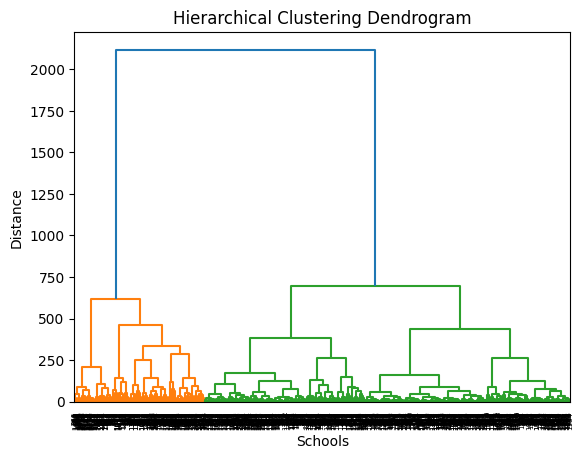

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

columns_of_interest = ['High Needs #.1', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'Native American']

# calculate the correlations between the selected columns and the test performance column
correlations = master_df[columns_of_interest]
correlations = correlations.dropna()

# df_standardized = (correlations - correlations.mean()) / correlations.std()
# df_standardized

# Perform hierarchical clustering
Z = linkage(correlations, method='ward')

# Plot the dendrogram to visualize the clusters
dendrogram(Z)

# Add labels to the plot
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Schools')
plt.ylabel('Distance')

# Show the plot
plt.show()


### 2.1.6 Hierarchy - Economic and Race Features Only - Standardized Data

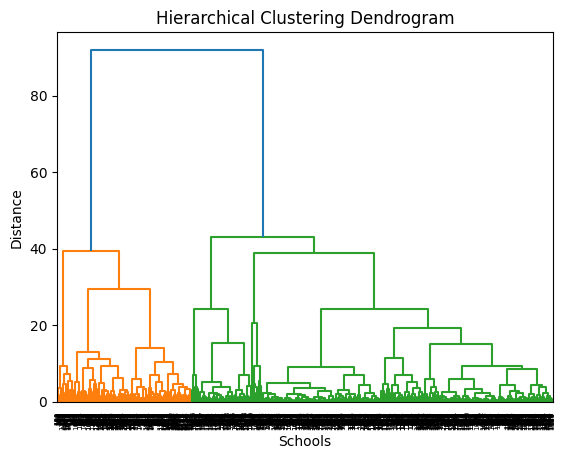

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

columns_of_interest = ['High Needs #.1', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'Native American']

# calculate the correlations between the selected columns and the test performance column
correlations = master_df[columns_of_interest]
correlations = correlations.dropna()

df_standardized = (correlations - correlations.mean()) / correlations.std()
# df_standardized

# Perform hierarchical clustering
Z = linkage(df_standardized, method='ward')

# Plot the dendrogram to visualize the clusters
dendrogram(Z)

# Add labels to the plot
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Schools')
plt.ylabel('Distance')

# Show the plot
plt.show()


### 2.1.7 Hierarchy - All Features (not yet) - Nonstandardized Data

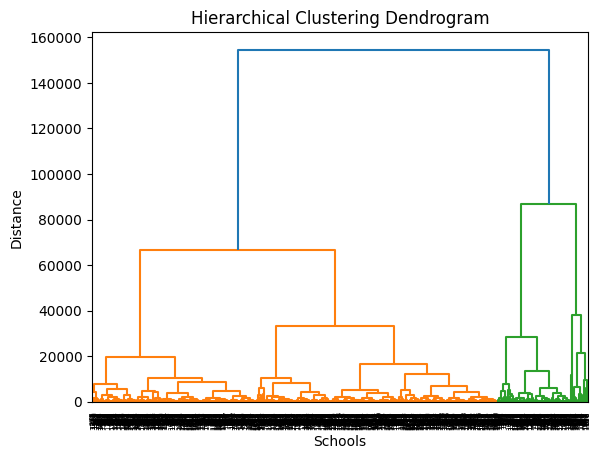

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

columns_of_interest = ['pp_stloc_raw_MA', 'pp_fed_raw_MA','First Language Not English %', 'student_teacher_ratio','High Needs #.1', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'Native American']

# calculate the correlations between the selected columns and the test performance column
correlations = master_df[columns_of_interest]
correlations = correlations.dropna()

# df_standardized = (correlations - correlations.mean()) / correlations.std()
# df_standardized

# Perform hierarchical clustering
Z = linkage(correlations, method='ward')

# Plot the dendrogram to visualize the clusters
dendrogram(Z)

# Add labels to the plot
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Schools')
plt.ylabel('Distance')

# Show the plot
plt.show()


### 2.1.8 Hierarchy - All Features (not yet) - Standardized Data

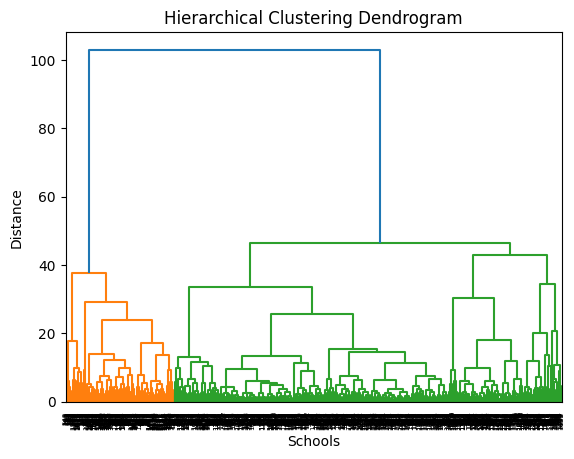

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

columns_of_interest = ['pp_stloc_raw_MA', 'pp_fed_raw_MA','First Language Not English %', 'student_teacher_ratio','High Needs #.1', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'Native American']

# calculate the correlations between the selected columns and the test performance column
correlations = master_df[columns_of_interest]
correlations = correlations.dropna()

df_standardized = (correlations - correlations.mean()) / correlations.std()
# df_standardized

# Perform hierarchical clustering
Z = linkage(df_standardized, method='ward')

# Plot the dendrogram to visualize the clusters
dendrogram(Z)

# Add labels to the plot
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Schools')
plt.ylabel('Distance')

# Show the plot
plt.show()


### 2.1.9 Summary of Insights

todo:

## 2.2 Are there differences in trends between elementary schools, middle schools, and high schools?

In [24]:
# to-do: compare the linear fit lines for major features between elementary schools, middle schools, and high schools

## 2.3 What type of features do high performing, high income schools have?

### 2.3.1 Finding Mean / Median Values

In [25]:
# to-do: calculate the top 20 percentile of performing schools and calculate their average feature values

# to-do: calculate the top 20 percentile of performing elementary schools and calculate their average feature values

# to-do: calculate the top 20 percentile of performing middle schools and calculate their average feature values

# to-do: calculate the top 20 percentile of performing high schools and calculate their average feature values

### 2.3.2 Using Cluster Analysis

In [26]:
# to-do: filter by top 20 percentile of schools and find the primary clusters if k=2 or k=3 or k=4

# to-do: filter by top 20 percentile of elementary schools and find the primary clusters if k=2 or k=3 or k=4

# to-do: filter by top 20 percentile of middle schools and find the primary clusters if k=2 or k=3 or k=4

# to-do: filter by top 20 percentile of high schools and find the primary clusters if k=2 or k=3 or k=4

## 2.4 What type of features do high performing, low income schools have?

repeat same process as 2.3

## 2.5 What type of features do low performing, low income schools have?

repeat same process as 2.3

## 2.5 What type of features do low performing, high income schools have?

repeat same process as 2.3